In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

import warnings
warnings.simplefilter("ignore")

In [2]:
#loading the dataset
df=pd.read_csv('admission_predict.csv')
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


#### Exploring the dataset

In [3]:
#Returns no of rows and columns
df.shape


(500, 9)

In [4]:
#Returns the first X number of rows when head(X). By default it returns first 5 rows.
df.head(15)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


In [5]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
df.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73
499,500,327,113,4,4.5,4.5,9.04,0,0.84


In [7]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [8]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [9]:
df.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [10]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [11]:
df=df.rename(columns={'GRE Score':'GRE', 'TOEFL Score':'TOEFL'})
df.head()

,Serial No.,GRE,TOEFL,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [12]:
df=df.rename(columns={'Chance of Admit ':'Probability'})
df.head()

,Serial No.,GRE,TOEFL,University Rating,SOP,LOR,CGPA,Research,Probability
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


### Data Visualization

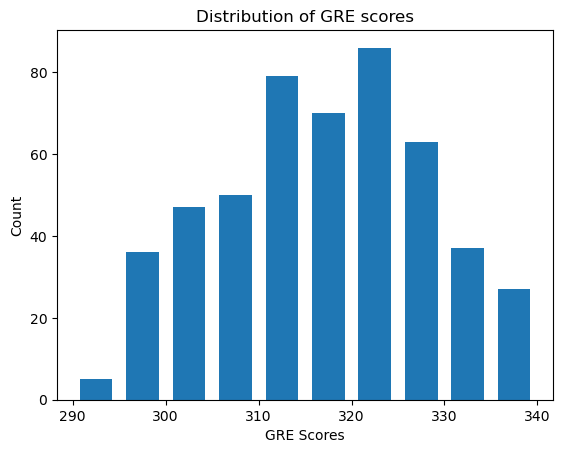

In [13]:
#Visualizing the feature / column GRE
fig=plt.hist(df['GRE'],rwidth=0.7)
plt.title('Distribution of GRE scores')
plt.xlabel('GRE Scores')
plt.ylabel('Count')
plt.show()

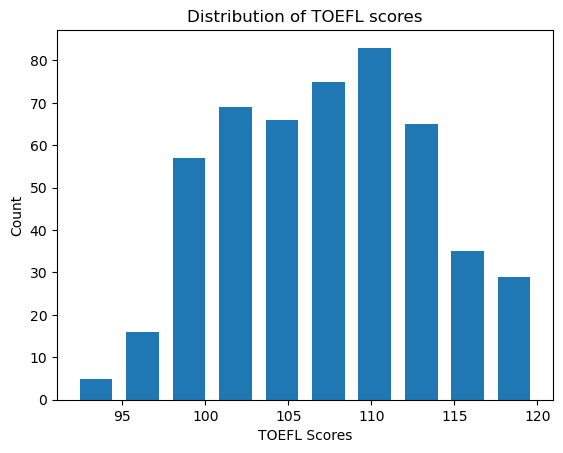

In [14]:
#Visualizing the feature / column TOEFL
fig=plt.hist(df['TOEFL'],rwidth=0.7)
plt.title('Distribution of TOEFL scores')
plt.xlabel('TOEFL Scores')
plt.ylabel('Count')
plt.show()

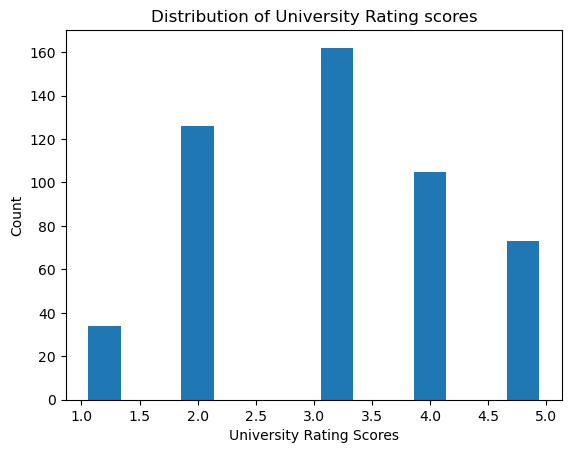

In [15]:
#Visualizing the feature / column University Rating
fig=plt.hist(df['University Rating'],rwidth=0.7)
plt.title('Distribution of University Rating scores')
plt.xlabel('University Rating Scores')
plt.ylabel('Count')
plt.show()

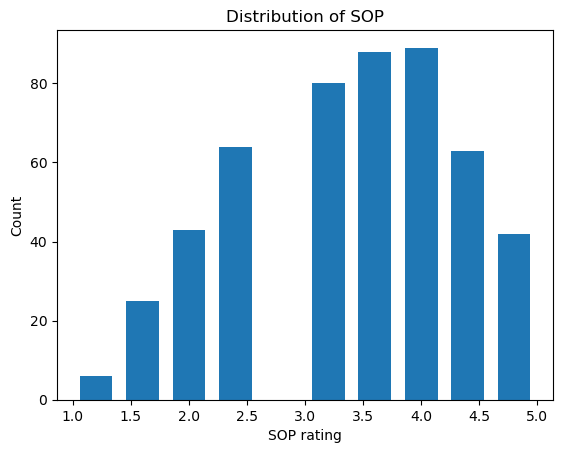

In [16]:
#Visualizing the feature / column SOP
fig=plt.hist(df['SOP'],rwidth=0.7)
plt.title('Distribution of SOP')
plt.xlabel('SOP rating')
plt.ylabel('Count')
plt.show()

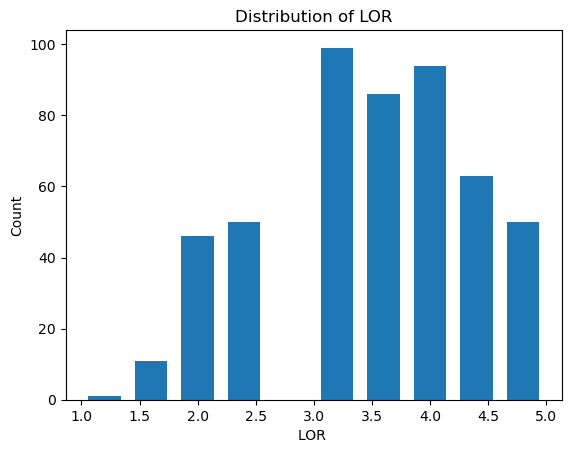

In [17]:
#Visualizing the feature / column LOR
fig=plt.hist(df['LOR '],rwidth=0.7)
plt.title('Distribution of LOR')
plt.xlabel('LOR ')
plt.ylabel('Count')
plt.show()

In [18]:
df

,Serial No.,GRE,TOEFL,University Rating,SOP,LOR,CGPA,Research,Probability
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


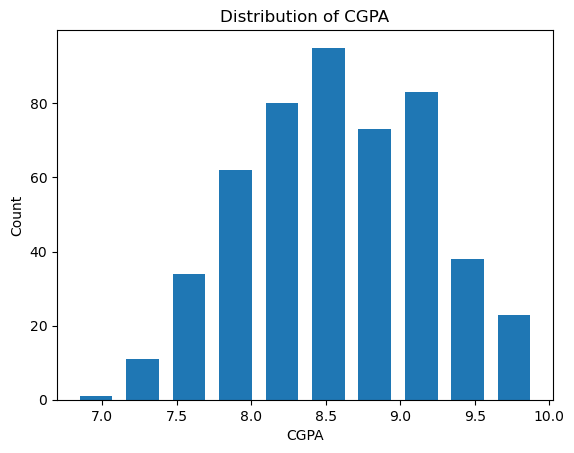

In [19]:
#Visualizing the feature / column CGPA
fig=plt.hist(df['CGPA'],rwidth=0.7)
plt.title('Distribution of CGPA')
plt.xlabel('CGPA')
plt.ylabel('Count')
plt.show()

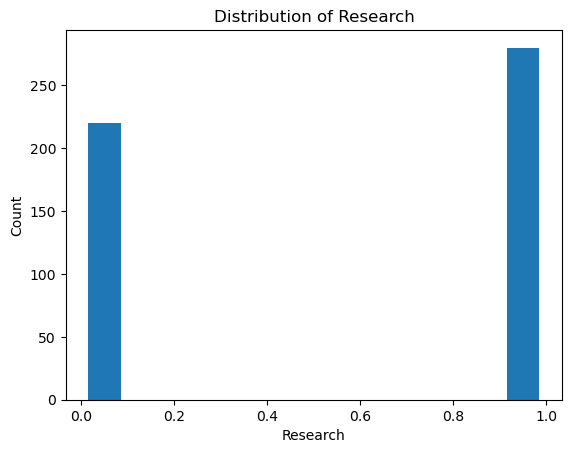

In [20]:
#Visualizing the feature / column CGPA
fig=plt.hist(df['Research'],rwidth=0.7)
plt.title('Distribution of Research')
plt.xlabel('Research')
plt.ylabel('Count')
plt.show()

In [21]:
#removing serial no and column
df.drop('Serial No.', axis='columns',inplace=True)
df.head()

,GRE,TOEFL,University Rating,SOP,LOR,CGPA,Research,Probability
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [22]:
#Replacing the 0 values from ['GRE','TOEFL','SOP','LOR ','CGPA'] by NaN
df_copy=df.copy(deep=True)
df_copy[['GRE','TOEFL','University Rating','SOP','LOR ','CGPA']]=df_copy[['GRE','TOEFL','University Rating','SOP','LOR ','CGPA']].replace(0, np.NaN)
df_copy.isnull().sum()

GRE                  0
TOEFL                0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Probability          0
dtype: int64

### Model Building

In [23]:
#Splitting the dataset
X=df_copy.drop('Probability',axis='columns')
y=df_copy['Probability']

In [24]:
#Using grid search CV to find best algorithm for this problem
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [25]:
#Creating a function to calculate best model for this problem
def find_best_model(X,y):
    models = {
        'linear_regression': {
            'model':LinearRegression(),
            'parameters':{
                'normalize':[True,False]
            }
        },
        
        'lasso':{
            'model':Lasso(),
            'parameters':{
                'alpha':[1,2],
                'selection':['random','cyclic']
            }
        },
        
        'svr':{
            'model': SVR(),
            'parameters':{
                'gamma':['auto','scale'],
            }
                
         },
        
        'decision_tree':{
            'model':DecisionTreeRegressor(),
            'parameters':{
                'criterion':['mse','friedman_mse'],
                'splitter':['best','random']
            }
        },
        
         'random_forest':{
            'model':RandomForestRegressor(criterion='mse'),
            'parameters':{
                'n_estimators':[5,10,15,20]
            }
         },
        
        'knn':{
            'model':KNeighborsRegressor(algorithm='auto'),
            'parameters':{
                'n_neighbors':[2,5,10,20]
            }
        }
    }
      
        
    scores=[]
    for model_name, model_params in models.items():
        gs= GridSearchCV(model_params['model'], model_params['parameters'],cv=5, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': model_name,
            'best_parameters': gs.best_params_,
            'score': gs.best_score_
        })
        
    return pd.DataFrame(scores,columns=['model','best_parameters','score'])

find_best_model(X,y)


,model,best_parameters,score
0,linear_regression,{'normalize': True},0.810802
1,lasso,"{'alpha': 1, 'selection': 'random'}",0.215088
2,svr,{'gamma': 'scale'},0.654099
3,decision_tree,"{'criterion': 'mse', 'splitter': 'best'}",0.576472
4,random_forest,{'n_estimators': 10},0.782942
5,knn,{'n_neighbors': 20},0.723017


### Since the Linear Regression algorithm has the highest accuracy, the model selected for this problem is Linear Regression

In [26]:
#Using Cross Validation Score for gaining highest accuracy
from sklearn.model_selection import cross_val_score
scores=cross_val_score(LinearRegression(normalize=True),X,y,cv=5)
print('Highest Accuracy: {}%'.format(round(sum(scores)*100/len(scores)),3))


Highest Accuracy: 81%


In [27]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=5)
print(len(X_train),len(X_test))

400 100


In [28]:
#Linear Regression
model = LinearRegression(normalize=True)
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.821478736588966

#### Predicting the values using our trained model

In [29]:
#prediction 1
#Input - GRE,TOEFL,University Rating, SOP,LOR, CGPA, Research

print('Chance of getting into UCLA is {}%'.format(round(model.predict([[337,118,4,4.5,4.5,9.65, 0]])[0]*100,3)))

Chance of getting into UCLA is 92.855%


In [30]:
#prediction 2
#Input - GRE,TOEFL,University Rating, SOP,LOR, CGPA, Research

print('Chance of getting into UCLA is {}%'.format(round(model.predict([[320,113,2,2.0,2.5,8.64,1]])[0]*100,3)))

Chance of getting into UCLA is 73.627%
